In [1]:
%precision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read and parse CO2 Data
CO2_measurement = pd.read_csv("../data/carbosense-raw/CO2_sensor_measurements.csv", sep='\t')

In [3]:
CO2_measurement.head()

,timestamp,LocationName,SensorUnit_ID,CO2
0,2017-10-01 00:05:00,ZGHD,1014,593.321562
1,2017-10-01 00:15:00,ZGHD,1014,595.846258
2,2017-10-01 00:25:00,ZGHD,1014,595.845353
3,2017-10-01 00:45:00,ZGHD,1014,599.039129
4,2017-10-01 00:55:00,ZGHD,1014,594.996629


In [4]:
CO2_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188966 entries, 0 to 188965
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      188966 non-null  object 
 1   LocationName   188966 non-null  object 
 2   SensorUnit_ID  188966 non-null  int64  
 3   CO2            188966 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.8+ MB


In [5]:
CO2_measurement['CO2'].describe()

count    188966.000000
mean        471.234182
std         108.642813
min         309.008819
25%         418.609166
50%         448.431301
75%         496.673534
max        7733.004603
Name: CO2, dtype: float64

In [6]:
CO2_measurement[['SensorUnit_ID','CO2']][CO2_measurement['SensorUnit_ID'] == 1177].count()

SensorUnit_ID    4460
CO2              4460
dtype: int64

In [7]:
CO2_measurement.groupby('SensorUnit_ID').count().sum()

timestamp       188966
LocationName    188966
CO2             188966
dtype: int64

In [8]:
CO2_1117 = CO2_measurement.groupby('SensorUnit_ID').filter(lambda x: x.name == 1117).reset_index()
CO2_1177 = CO2_measurement.groupby('SensorUnit_ID').filter(lambda x: x.name == 1177).reset_index()

In [9]:
CO2_1117.head()

,index,timestamp,LocationName,SensorUnit_ID,CO2
0,100100,2017-10-19 13:44:00,ZHRO,1117,435.517352
1,100101,2017-10-19 13:54:00,ZHRO,1117,431.920620
2,100102,2017-10-19 14:04:00,ZHRO,1117,433.222353
3,100103,2017-10-19 14:14:00,ZHRO,1117,427.284986
4,100104,2017-10-19 14:24:00,ZHRO,1117,431.055325


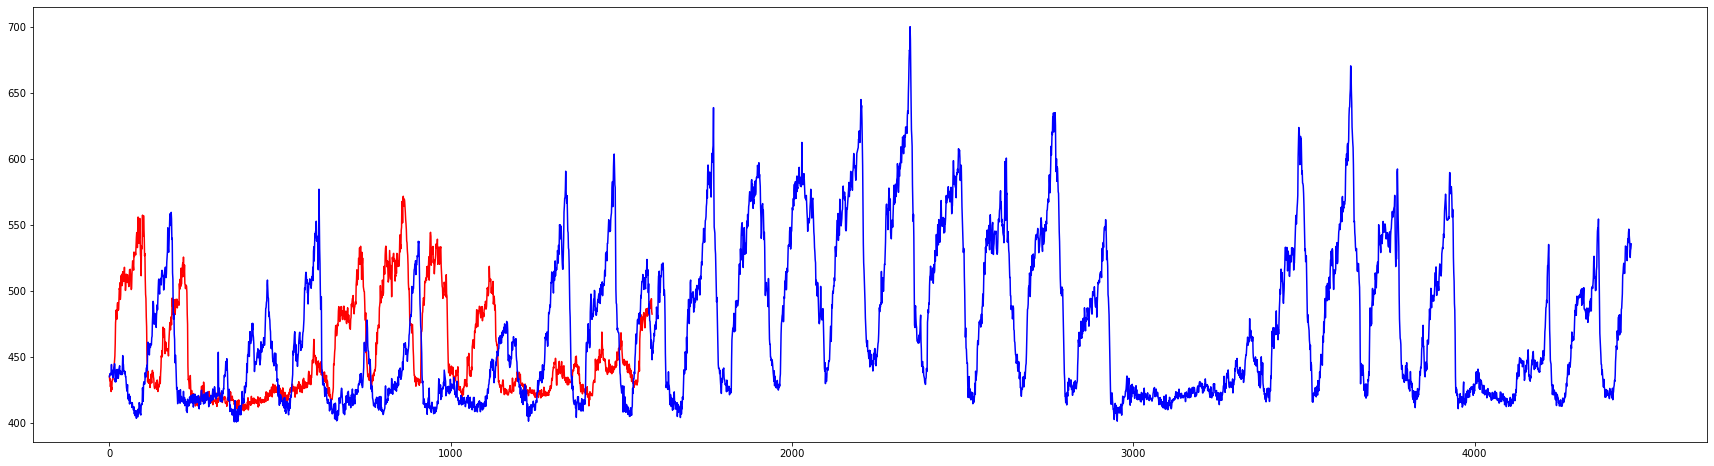

In [10]:
%matplotlib inline

plt.figure(figsize=(30,8))

plt.plot(CO2_1117['CO2'], 'r-')
plt.plot(CO2_1177['CO2'], 'b-')

In [11]:
# Something looks wrong...
# Use timestamp as index:
CO2_measurement = pd.read_csv('../data/carbosense-raw/CO2_sensor_measurements.csv', sep='\t', index_col=['timestamp'], parse_dates=True)

In [12]:
CO2_measurement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188966 entries, 2017-10-01 00:05:00 to 2017-10-31 23:43:00
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LocationName   188966 non-null  object 
 1   SensorUnit_ID  188966 non-null  int64  
 2   CO2            188966 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ MB


In [13]:
CO2_1117_wdate = CO2_measurement.groupby('SensorUnit_ID').filter(lambda x: x.name == 1117)
CO2_1177_wdate = CO2_measurement.groupby('SensorUnit_ID').filter(lambda x: x.name == 1177)

In [14]:
CO2_1117_wdate.shape

(1591, 3)

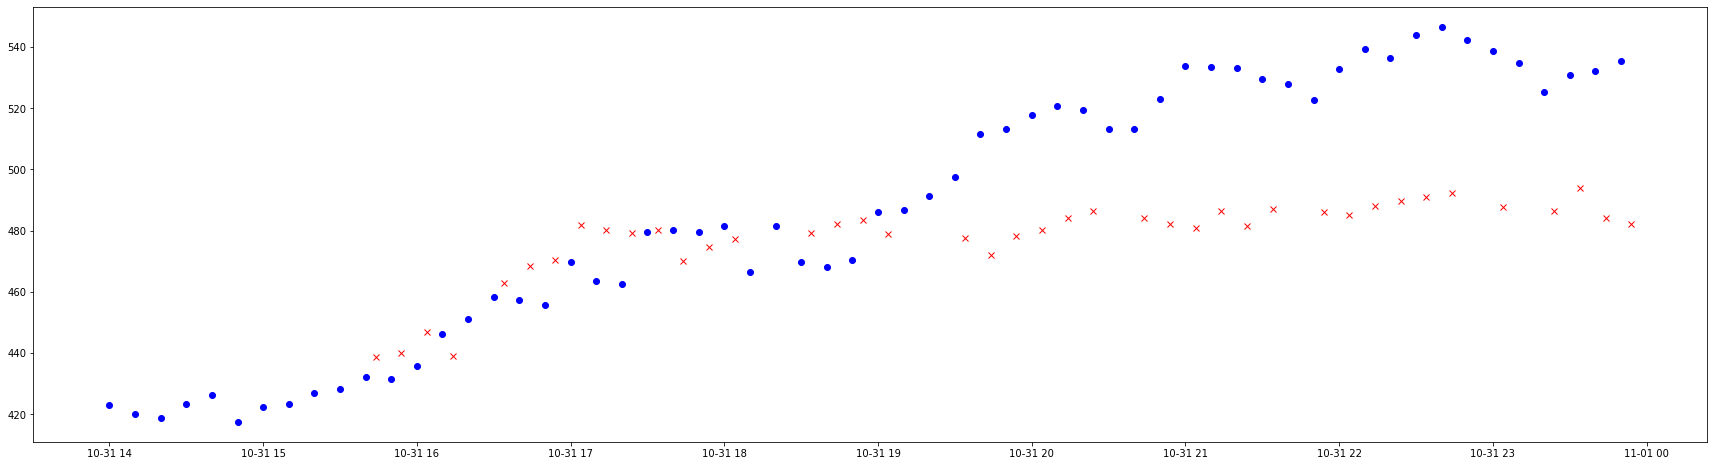

In [22]:
%matplotlib inline

plt.figure(figsize=(30,8))

plt.plot(CO2_1117_wdate['CO2'][1550:], 'rx')
plt.plot(CO2_1177_wdate['CO2'][4400:], 'bo')

In [16]:
# Resample 30mins and take mean to sync data
my_test = CO2_measurement.groupby('SensorUnit_ID').resample(rule = '30min')['CO2'].mean()

In [17]:
my_test.loc[1117].shape

(597,)

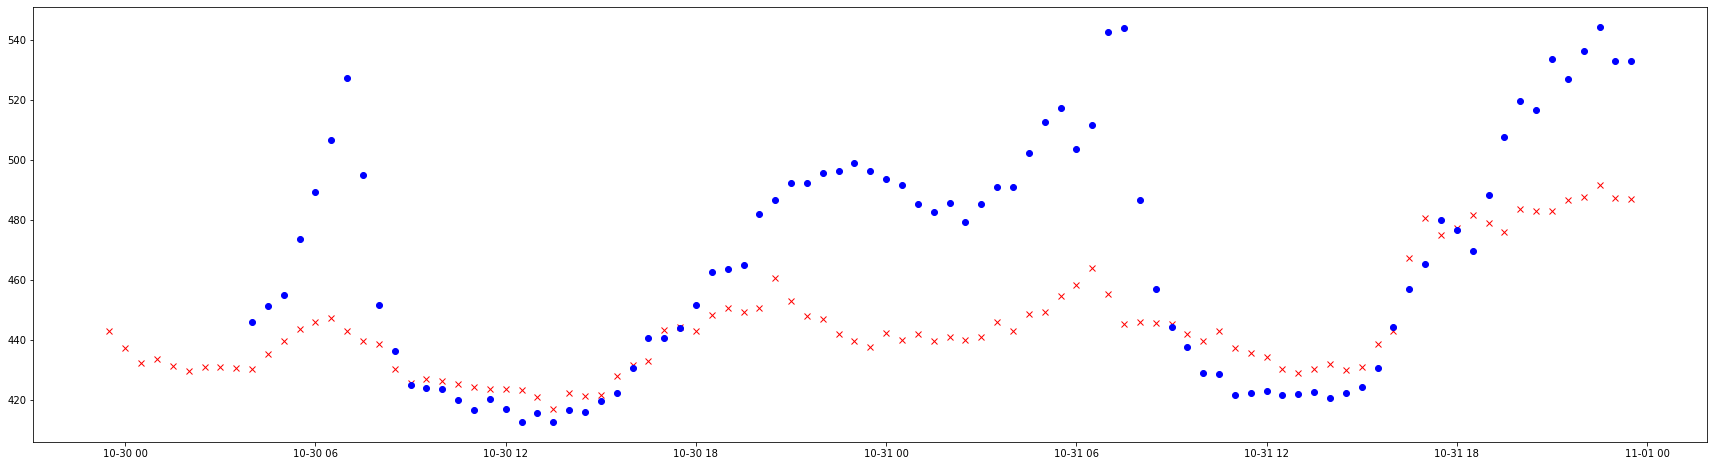

In [18]:
%matplotlib inline

plt.figure(figsize=(30,8))

plt.plot(my_test.loc[1117][500:], 'rx')
plt.plot(my_test.loc[1177][1400:], 'bo')

In [19]:
# Read, parse sensor metadata and put it in a DataFrame
sensors_metadata = pd.read_csv('../data/carbosense-raw/sensors_metadata_updated.csv')
type(sensors_metadata)

pandas.core.frame.DataFrame

In [20]:
sensors_metadata.head()

,Unnamed: 0,LocationName,zone,altitude,LAT,LON,X,Y
0,0,AJGR,2,627.8,47.33321,8.480300,243005.0,678731.4
1,1,BSCR,2,462.3,47.35581,8.430070,245468.0,674903.4
2,2,BUDF,10,490.2,47.36270,8.433110,246237.5,675123.8
3,3,KBRL,7,510.5,47.32582,8.537550,242242.3,683070.1
4,4,KTGM,2,530.3,47.32334,8.596422,242031.0,687523.9
